# Import des bibliothèques

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import des données

In [21]:
df_global = pd.read_csv('data\Ames_houses.csv')
df_global = df_global.sample(n=1460) #on prend n valeurs aléatoires (ici toutes)
df_price_global = df_global[['SalePrice']]
df_global = df_global.drop(['Id', 'SalePrice'], axis=1) #on supprime la colonne Id qui n'apporte aucune information car est unique pour chaque ligne

Analyse des données importées

In [22]:
df_global.shape, df_price_global.shape

((1460, 79), (1460, 1))

In [23]:
df_global.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
162,20,RL,95.0,12182,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,5,2010,New,Partial
273,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal
322,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal
1238,20,RL,63.0,13072,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Abnorml
1323,30,RL,50.0,5330,Pave,NaN,Reg,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,12,2009,WD,Normal


# Suppression des colonnes vides

In [24]:
#on créer un dataframe df_vide qui  contient pour chaque colonne le pourcentage de valeurs non renseignées
df_vide = [[nom_colonne, df_global[nom_colonne].isnull().mean() * 100] for nom_colonne in df_global.columns]
df_vide = pd.DataFrame(df_vide, columns=['nom_colonne', 'pourcentage_vide'])
df_vide = df_vide.sort_values(by='pourcentage_vide', ascending=False)

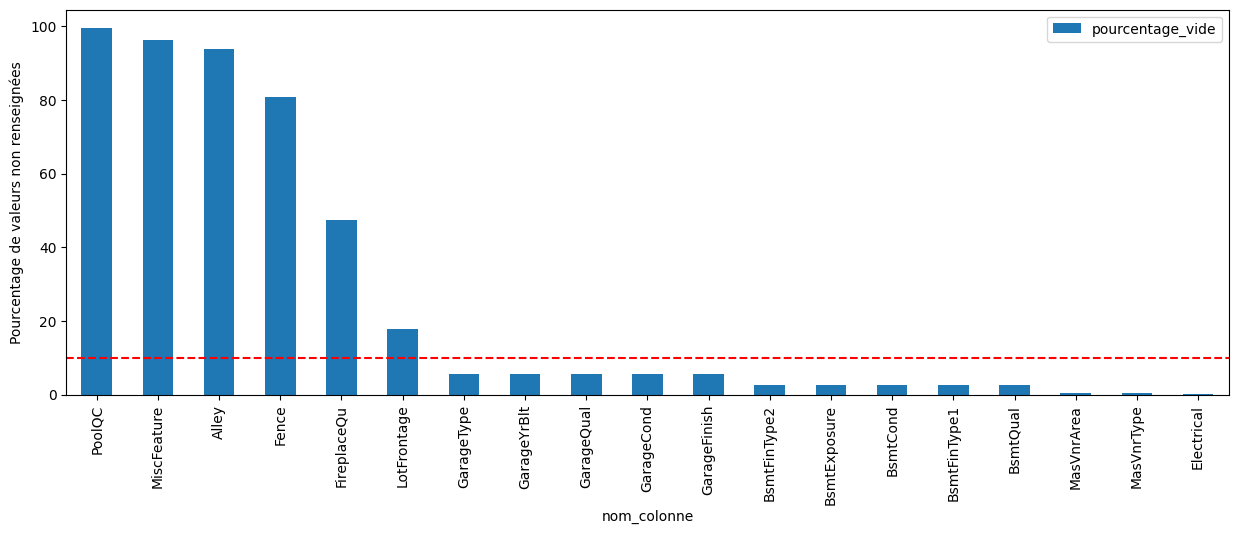

In [25]:
#on affiche graphiquement les colonnes les plus vides
df_vide.loc[df_vide['pourcentage_vide'] > 0.05].plot.bar(x='nom_colonne', y='pourcentage_vide', figsize=(15,5)) #on affiche que celle avec plus de 5% vide
plt.ylabel('Pourcentage de valeurs non renseignées')
plt.axhline(y=10,color='r',linestyle='--') #on trace sur le graphe la limite des 10%
plt.show()

In [26]:
#on supprime les colonnes plus de 10% vides
df_global = df_global.drop(df_vide[df_vide['pourcentage_vide'] > 10]['nom_colonne'], axis=1)

Vérification de la suppression des colonnes

In [27]:
print(df_global.shape)

(1460, 73)


# Remplissage des valeurs manquantes

In [28]:
for nom_colonne in df_global:
    if df_global[nom_colonne].dtype == 'object':
      plus_represente = df_global[nom_colonne].mode().iloc[0] #on met la valeur la plus représentée dans les colonnes catégorielles
      df_global[nom_colonne] = df_global[nom_colonne].fillna(plus_represente)
    else:
      moyenne = df_global[nom_colonne].mean() #on met la valeur la plus représentée dans les colonnes catégorielles
      df_global[nom_colonne] = df_global[nom_colonne].fillna(moyenne)

Vérification du remplissage

In [29]:
#on vérifie ensuite que toutes les colonnes sont bien remplies

df_vide = [[nom_colonne, df_global[nom_colonne].isnull().mean() * 100] for nom_colonne in df_global.columns]
df_vide = pd.DataFrame(df_vide, columns=['nom_colonne', 'pourcentage_vide'])

print(df_vide['pourcentage_vide'].sum())

0.0


# Encodage des colonnes catégorielles

In [30]:
# On applique get_dummies() pour les colonnes catégorielles
df_global = pd.get_dummies(df_global, columns = df_global.select_dtypes(include=['object']).columns)

Vérification du remplissage

In [31]:
df_global.head() #plus de string mais des valeurs binaires

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
162,20,12182,7,5,2005,2005,226.0,1201,0,340,...,0,1,0,0,0,0,0,0,0,1
273,20,9600,6,6,1958,1988,183.0,620,620,0,...,0,0,0,1,0,0,0,0,1,0
322,60,10380,7,5,1986,1987,172.0,28,1474,0,...,0,0,0,1,0,0,0,0,1,0
1238,20,13072,6,5,2005,2005,0.0,0,0,1141,...,0,0,0,1,1,0,0,0,0,0
1323,30,5330,4,7,1940,1950,0.0,280,0,140,...,0,0,0,1,0,0,0,0,1,0


On obtient 269 colonnes au total

# Analyse de la corrélation entre les caractéristiques et la variable cible

In [32]:
train_global = pd.concat([df_global, df_price_global], axis=1) #on associe les labels prix aux données d'entrainement

In [33]:
corr = train_global.corr()
nom_colonne = corr[corr['SalePrice']>0.5].index #on supprime les colonnes corrélées à moins de 0.5 avec SalePrice

On vérifie cela graphiquement

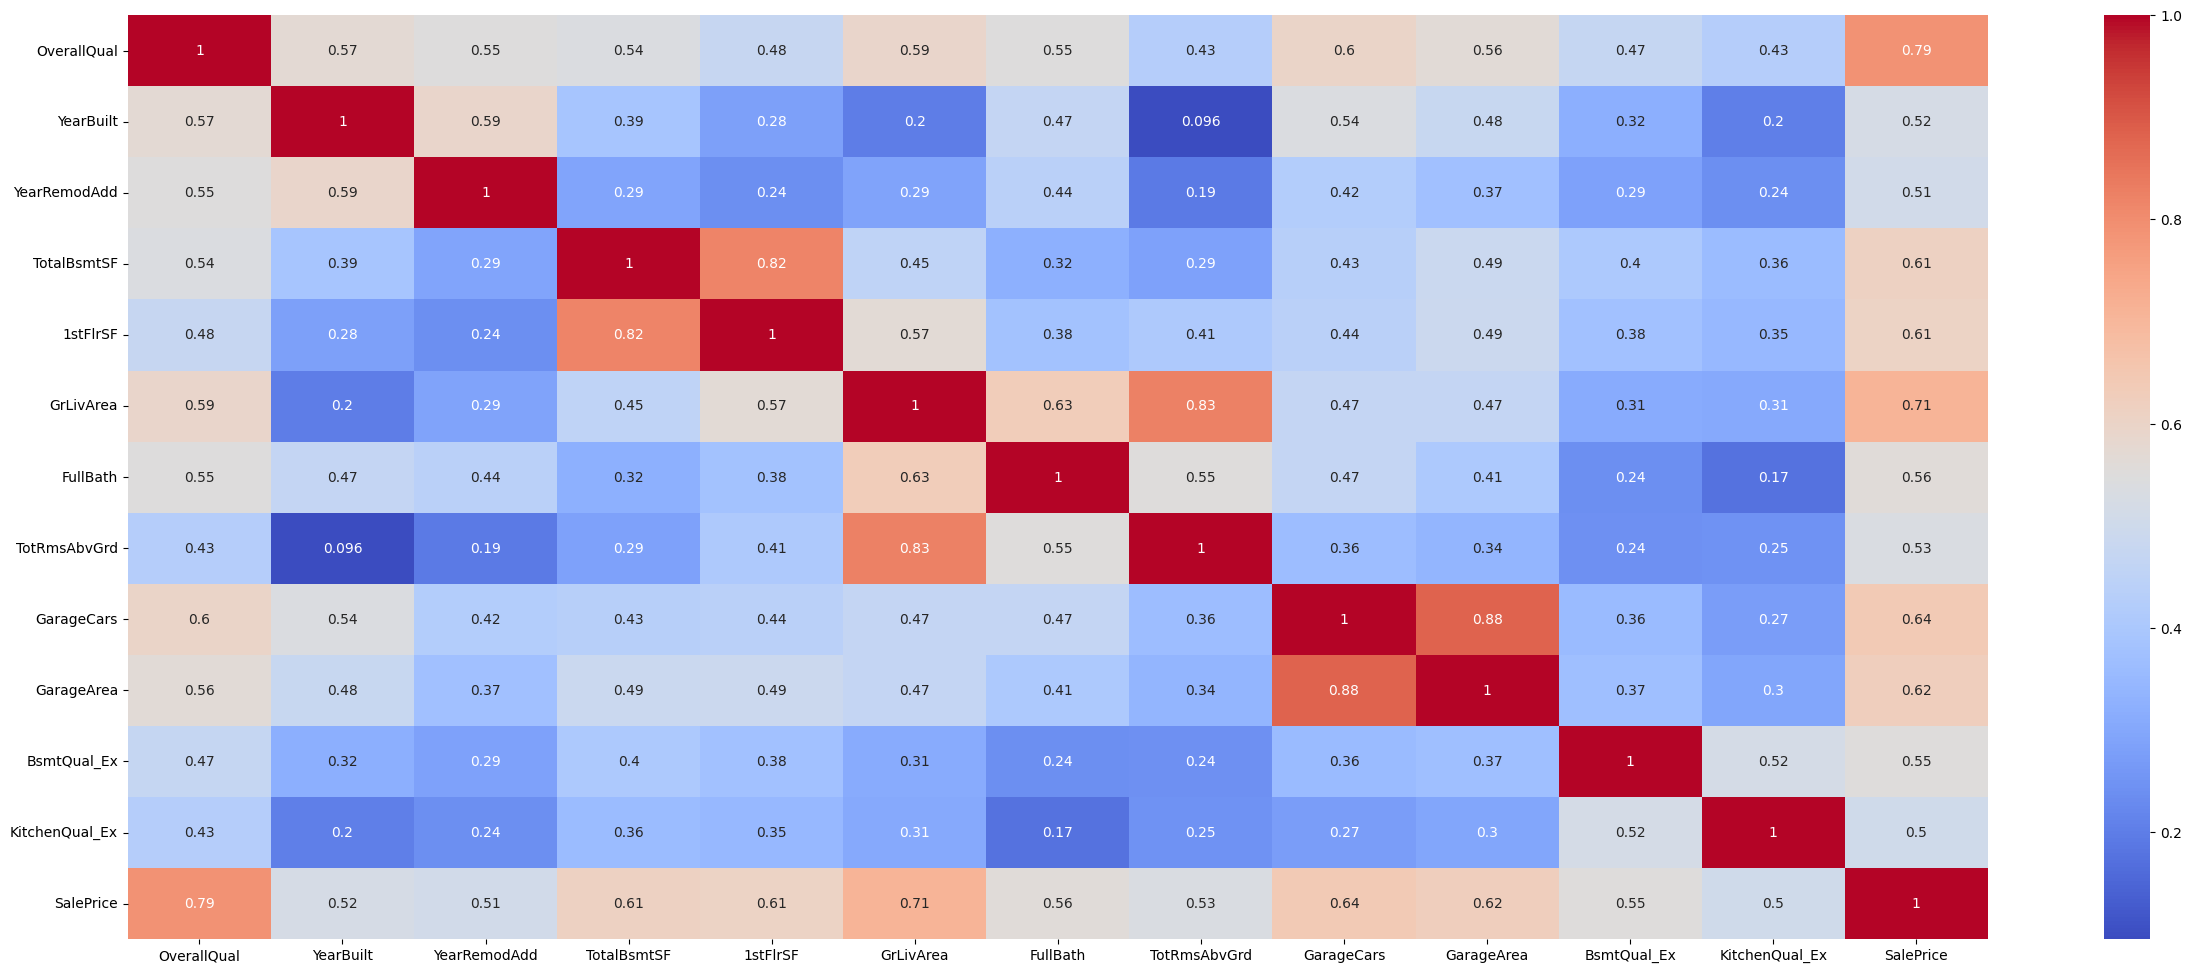

In [34]:
import seaborn as sns

train_global = train_global[nom_colonne]
plt.figure(figsize=(30,12))
sns.heatmap(train_global.corr(), cmap = 'coolwarm', annot=True)
plt.show()

Dans la colonne/ligne SalePrice, toutes les colonnes conservées ont plus de 0.5 comme valeur dans la matrice de corrélation

In [35]:
nom_colonne = nom_colonne.drop(['SalePrice'])
X_train = df_global[nom_colonne]
y_train = df_price_global

# IMPLÉMENTATION DE LA RÉGRESSION


Import des métriques utilisées

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Modèle Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)



c:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [39]:
import joblib

joblib.dump(gb_regressor, 'models/gb_regressor.pkl')
gb_regressor = joblib.load('models/gb_regressor.pkl')

In [46]:
# Créer un dataframe à partir des données fournies
data = pd.DataFrame(np.array([[7, 2003, 2003, 856, 856, 1710, 2, 8, 2, 548, 1, 1]]),
                    columns=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                             'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                             'BsmtQual_Ex', 'KitchenQual_Ex'])

# Charger le modèle entraîné
gb_regressor = joblib.load('models/gb_regressor.pkl')

# Utiliser le modèle pour faire des prédictions
predictions = gb_regressor.predict(data)
predictions

# IMPLÉMENTATION DE LA CLASSIFICATION

import de la métrique utilisée

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

On sépare les prix en 4 classes correspondant aux 4 quartiles (classe 0, 1, 2, 3)

In [41]:
from sklearn.preprocessing import LabelEncoder

df_global = df_global[nom_colonne]
df_price_global['SalePrice_class'] = pd.qcut(df_price_global['SalePrice'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
le = LabelEncoder()
df_price_global['SalePrice_class'] = le.fit_transform(df_price_global['SalePrice_class'])

In [42]:
df_price_global['SalePrice_class'].head(10)

162     3
273     1
322     3
1238    1
1323    0
765     3
591     3
133     3
587     1
182     0
Name: SalePrice_class, dtype: int32

On sépare en jeu les labels des données

In [43]:
X_train = df_global
y_train = df_price_global['SalePrice_class']

Modèle Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [45]:
import joblib

joblib.dump(rf, 'models/rf_classifier.pkl')
rf = joblib.load('models/rf_classifier.pkl')

In [49]:
# Créer un dataframe à partir des données fournies
data = pd.DataFrame(np.array([[7, 2003, 2003, 856, 856, 1710, 2, 8, 2, 548, 1, 1]]),
                    columns=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                             'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                             'BsmtQual_Ex', 'KitchenQual_Ex'])

# Charger le modèle entraîné
rf_classifier = joblib.load('models/rf_classifier.pkl')

# Utiliser le modèle pour faire des prédictions
predictions = rf_classifier.predict(data)
predictions

array([2])